# Car Price Regression Analysis

## About Dataset
### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

**Which variables are significant in predicting the price of a car**

How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

### Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

**Please Note : The dataset provided is for learning purpose. Please don’t draw any inference with real world scenario.**

In [65]:
#Importacion de las librerias que estaremos utilizando

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings("ignore")
import patsy

In [66]:
# #Preparacion para la descarga del dataset
# import os
# import shutil

# # Crear la carpeta .kaggle si no existe
# os.makedirs("/root/.kaggle", exist_ok=True)

# # Mover el archivo kaggle.json a la carpeta correcta
# shutil.move("kaggle.json", "/root/.kaggle/")

# # Cambiar permisos para evitar problemas de acceso
# os.chmod("/root/.kaggle/kaggle.json", 600)

In [67]:
!kaggle datasets download -d hellbuoy/car-price-prediction

Dataset URL: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction
License(s): unknown
car-price-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [68]:
import zipfile

with zipfile.ZipFile("car-price-prediction.zip", "r") as zip_ref:
    zip_ref.extractall("car_price_dataset")  # Extraer en una carpeta

The dataset is acquired and structured into a dataframe using the Pandas library, facilitating its manipulation and analysis within the framework of inferential statistics.

In [69]:
car_dataset = pd.read_csv("car_price_dataset/CarPrice_Assignment.csv")
car_dataset.head() #Vistazo de los datos

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


We will conduct an initial exploration of the dataset by analyzing key statistical measures, which will provide insights into its distribution and characteristics, essential for subsequent inferential analysis.



In [70]:
car_dataset.info() #Buscamos si hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

The dataset appears to be clean, as it does not contain any null values.

In [71]:
#Para facilitar un poco el analisis vamos a tener en cuenta las variables categoricas a parte de las variables numericas
qualitative_car_columns = car_dataset.select_dtypes(include=["object"]).columns
quantitative_car_columns = car_dataset.select_dtypes(exclude=["object"]).columns
car_dataset[qualitative_car_columns].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [72]:
car_dataset[quantitative_car_columns].head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [73]:
#Algunas estadisticas de la variables categoricas
car_dataset[qualitative_car_columns].describe()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [74]:
car_dataset[quantitative_car_columns].shape

(205, 16)

In [75]:
car_dataset.describe() #Algunas estadisticas de las variables numericas

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Let us review the categorical variables and the information they contain.

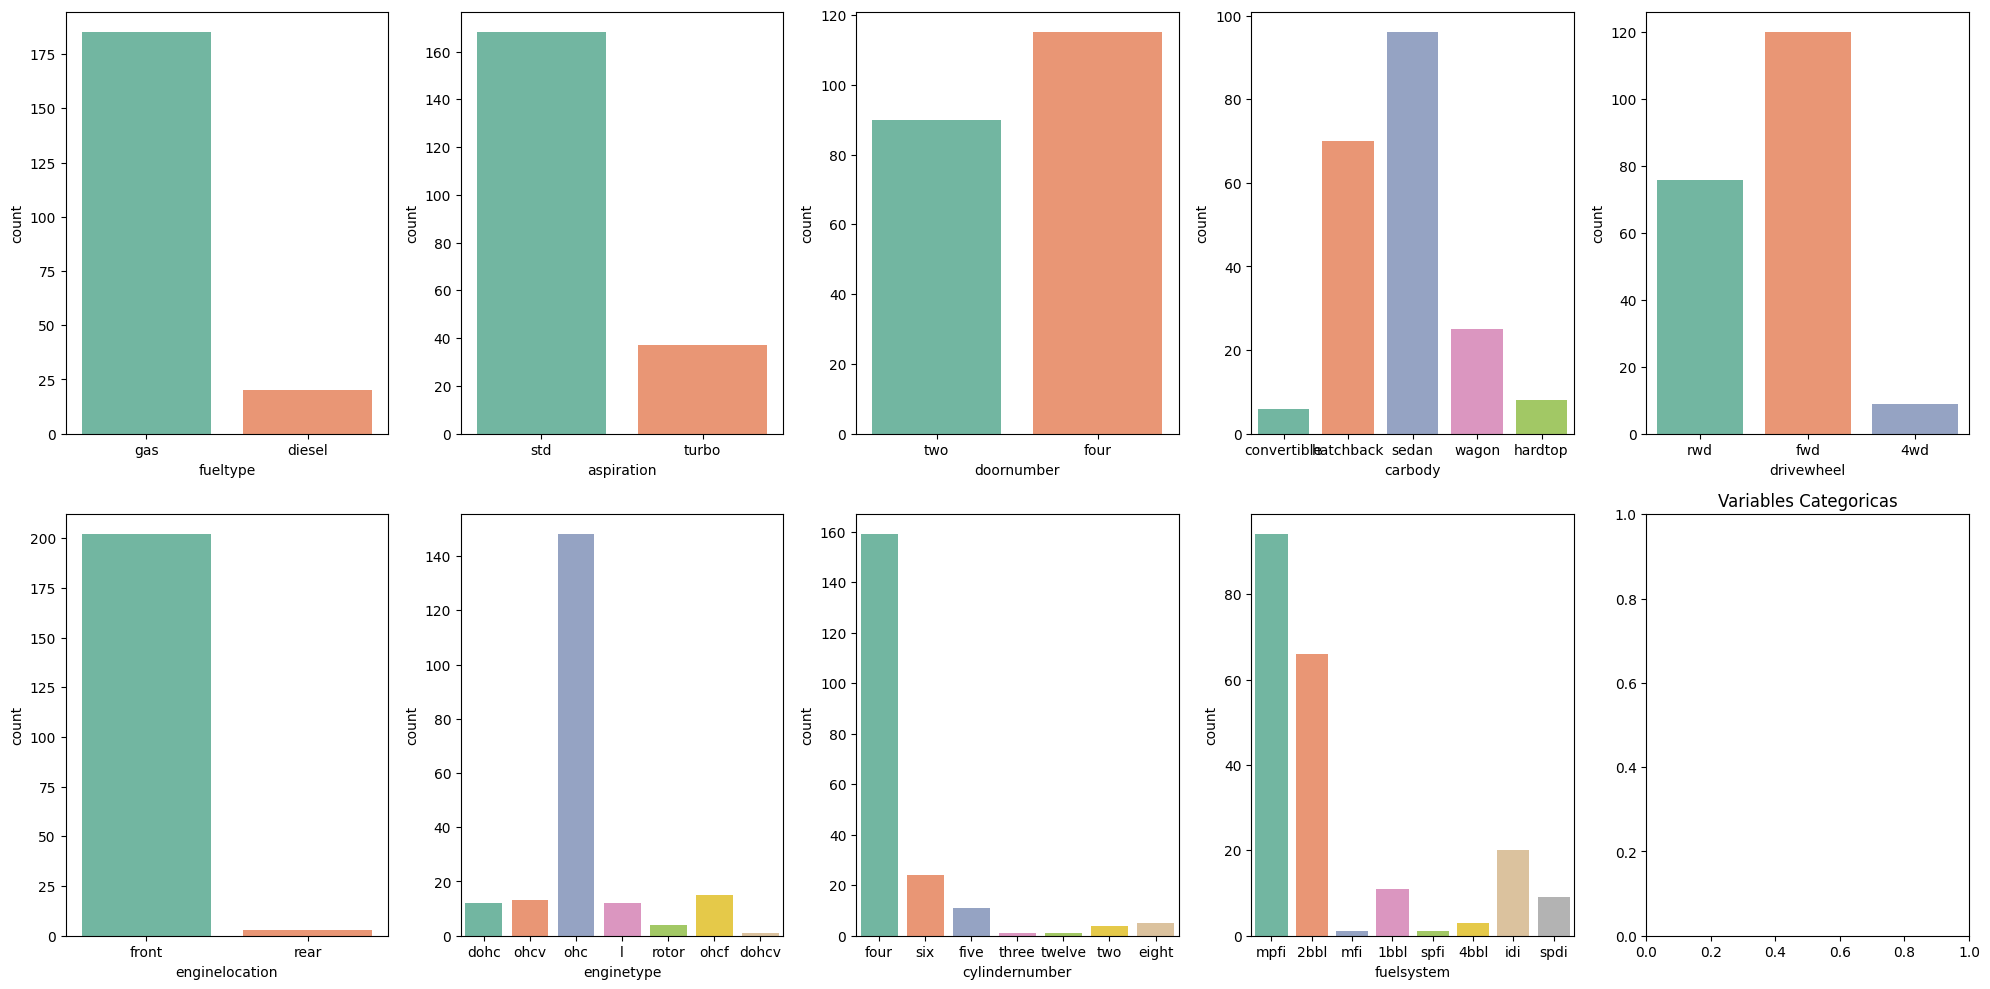

In [76]:
fig, ax = plt.subplots(2,5, figsize=(20,10))
for i, column in enumerate(qualitative_car_columns.drop('CarName')):
    row = i // 5
    col = i % 5
    sns.countplot(data=car_dataset, x=column, ax=ax[row, col], hue=column, palette="Set2")
plt.title("Variables Categoricas")
plt.tight_layout()
plt.show()

Let us review the numerical variables and their behavior.

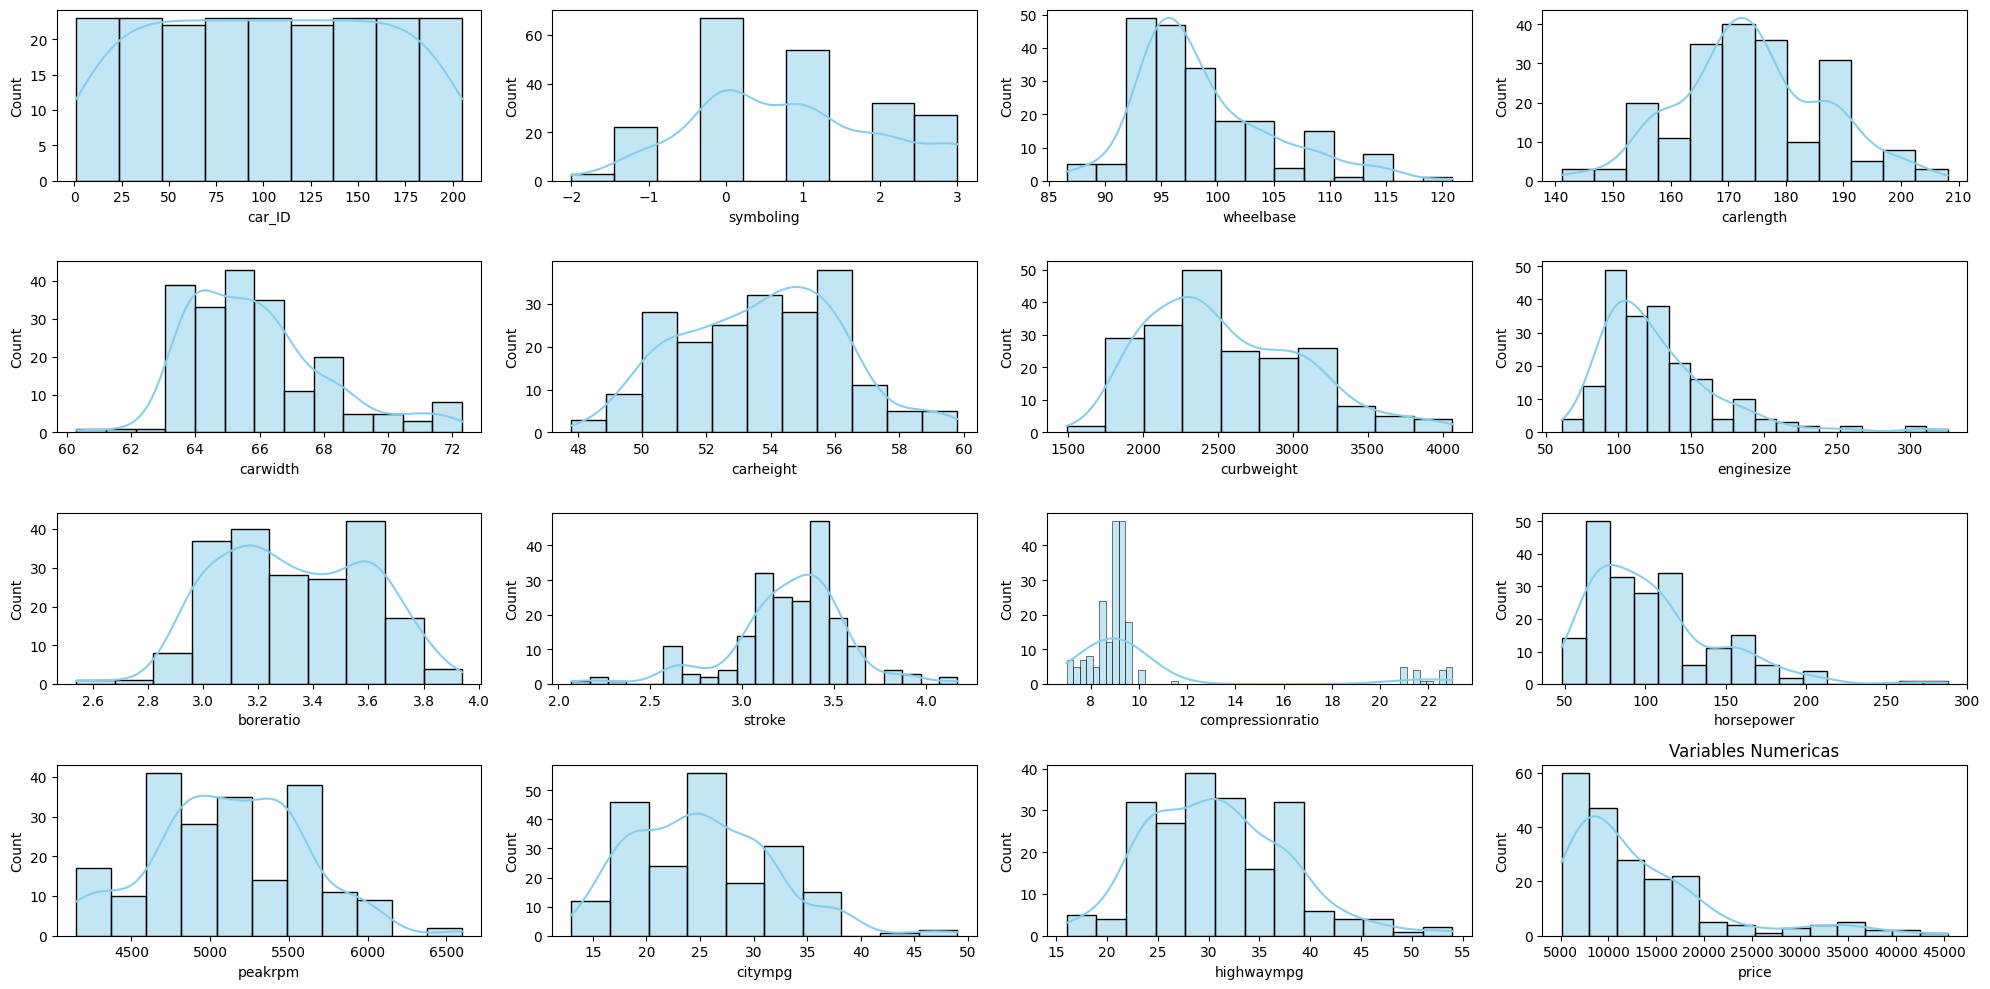

In [77]:
fig, ax = plt.subplots(4,4, figsize=(20,10))
for i, column in enumerate(quantitative_car_columns):
    row = i // 4
    col = i % 4
    sns.histplot(data=car_dataset, x=column, ax=ax[row, col], color="skyblue", kde=True)
plt.title("Variables Numericas")
plt.tight_layout()
plt.show()


To assess the relationship between the predictors and the target variable, it is necessary to evaluate their correlations. Given the presence of categorical variables, we will employ the one-hot encoding technique to convert them into numerical format. Subsequently, we will calculate the correlation coefficients across all variables to quantify their associations.

In [78]:
#Convertir variables categoricas a one-hot-encoding
car_dataset_dum = pd.get_dummies(car_dataset, columns=qualitative_car_columns, drop_first=True).astype(np.float_)
car_dataset_dum.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,2.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5.0,2.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


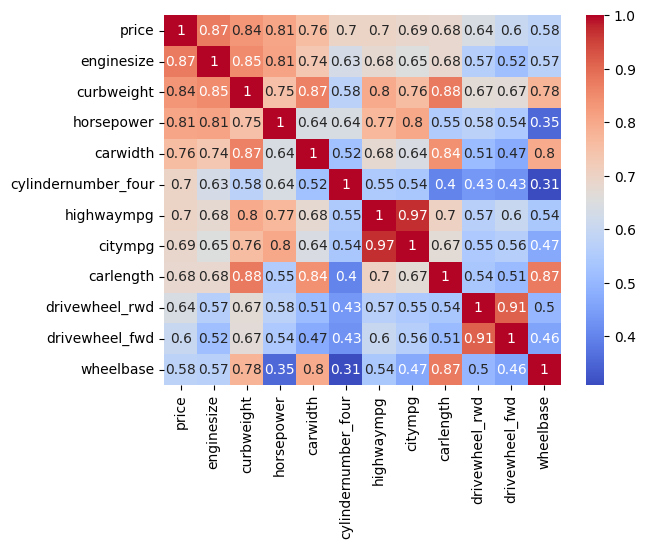

In [79]:
#Revisemos ahora los coeficientes de correlacion para ver las variables que tienen alta correlacion
correlations = np.abs(car_dataset_dum.corr())
sorted_correlations = correlations.sort_values(key=lambda x: abs(x), ascending=False, by='price')
sorted_correlations.drop("car_ID", inplace=True, axis=1) #El car ID no es metrica de evaluacion
sorted_correlations.drop("car_ID", inplace=True, axis=0)
columns_correlated = sorted_correlations['price'].index[:12]
sns.heatmap(correlations.loc[columns_correlated, columns_correlated], annot=True, cmap='coolwarm')
plt.show()

We will analyze each of these columns separately to assess their direct relationship with the target variable, price, in order to identify potential predictors and their influence on the outcome.

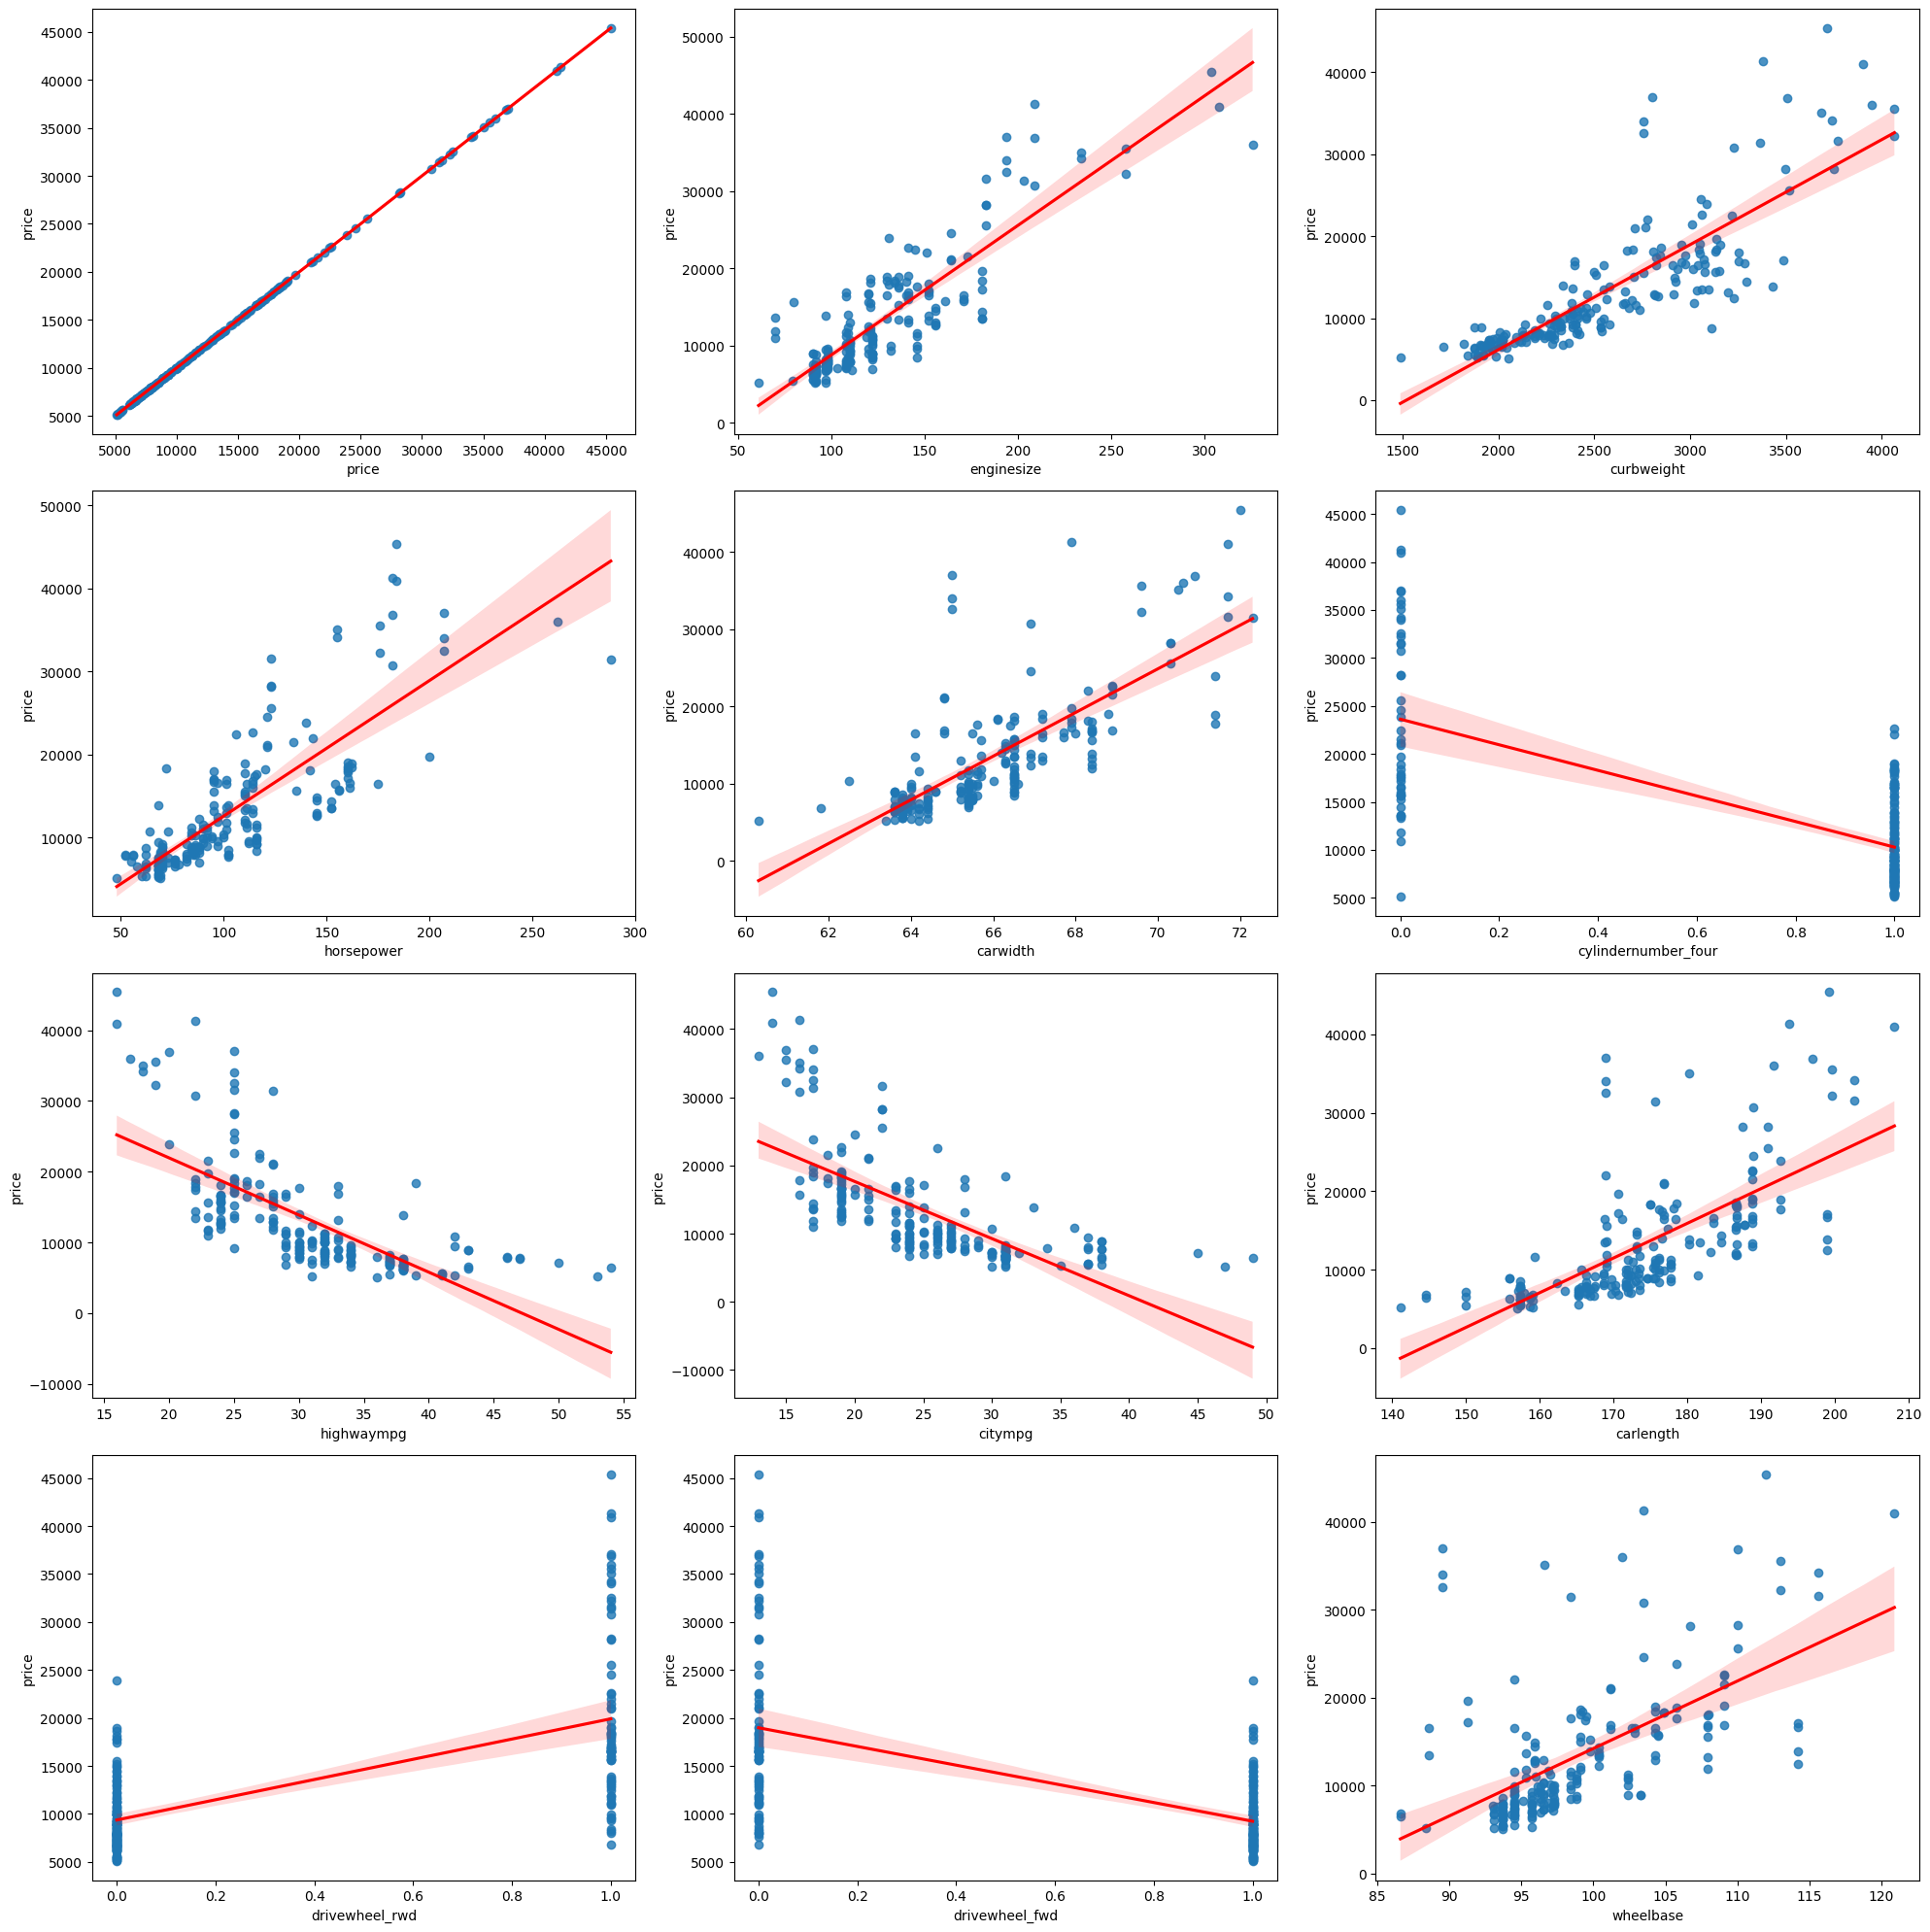

In [80]:
fig, ax = plt.subplots(4,3,figsize=(20,20))
for i, column in enumerate(columns_correlated):
    row = i // 3
    col = i % 3
    sns.regplot(data=car_dataset_dum, x=column, y='price', ax=ax[row, col], line_kws={'color': 'red'})
plt.subplots_adjust(bottom=0)
plt.tight_layout()
plt.show()

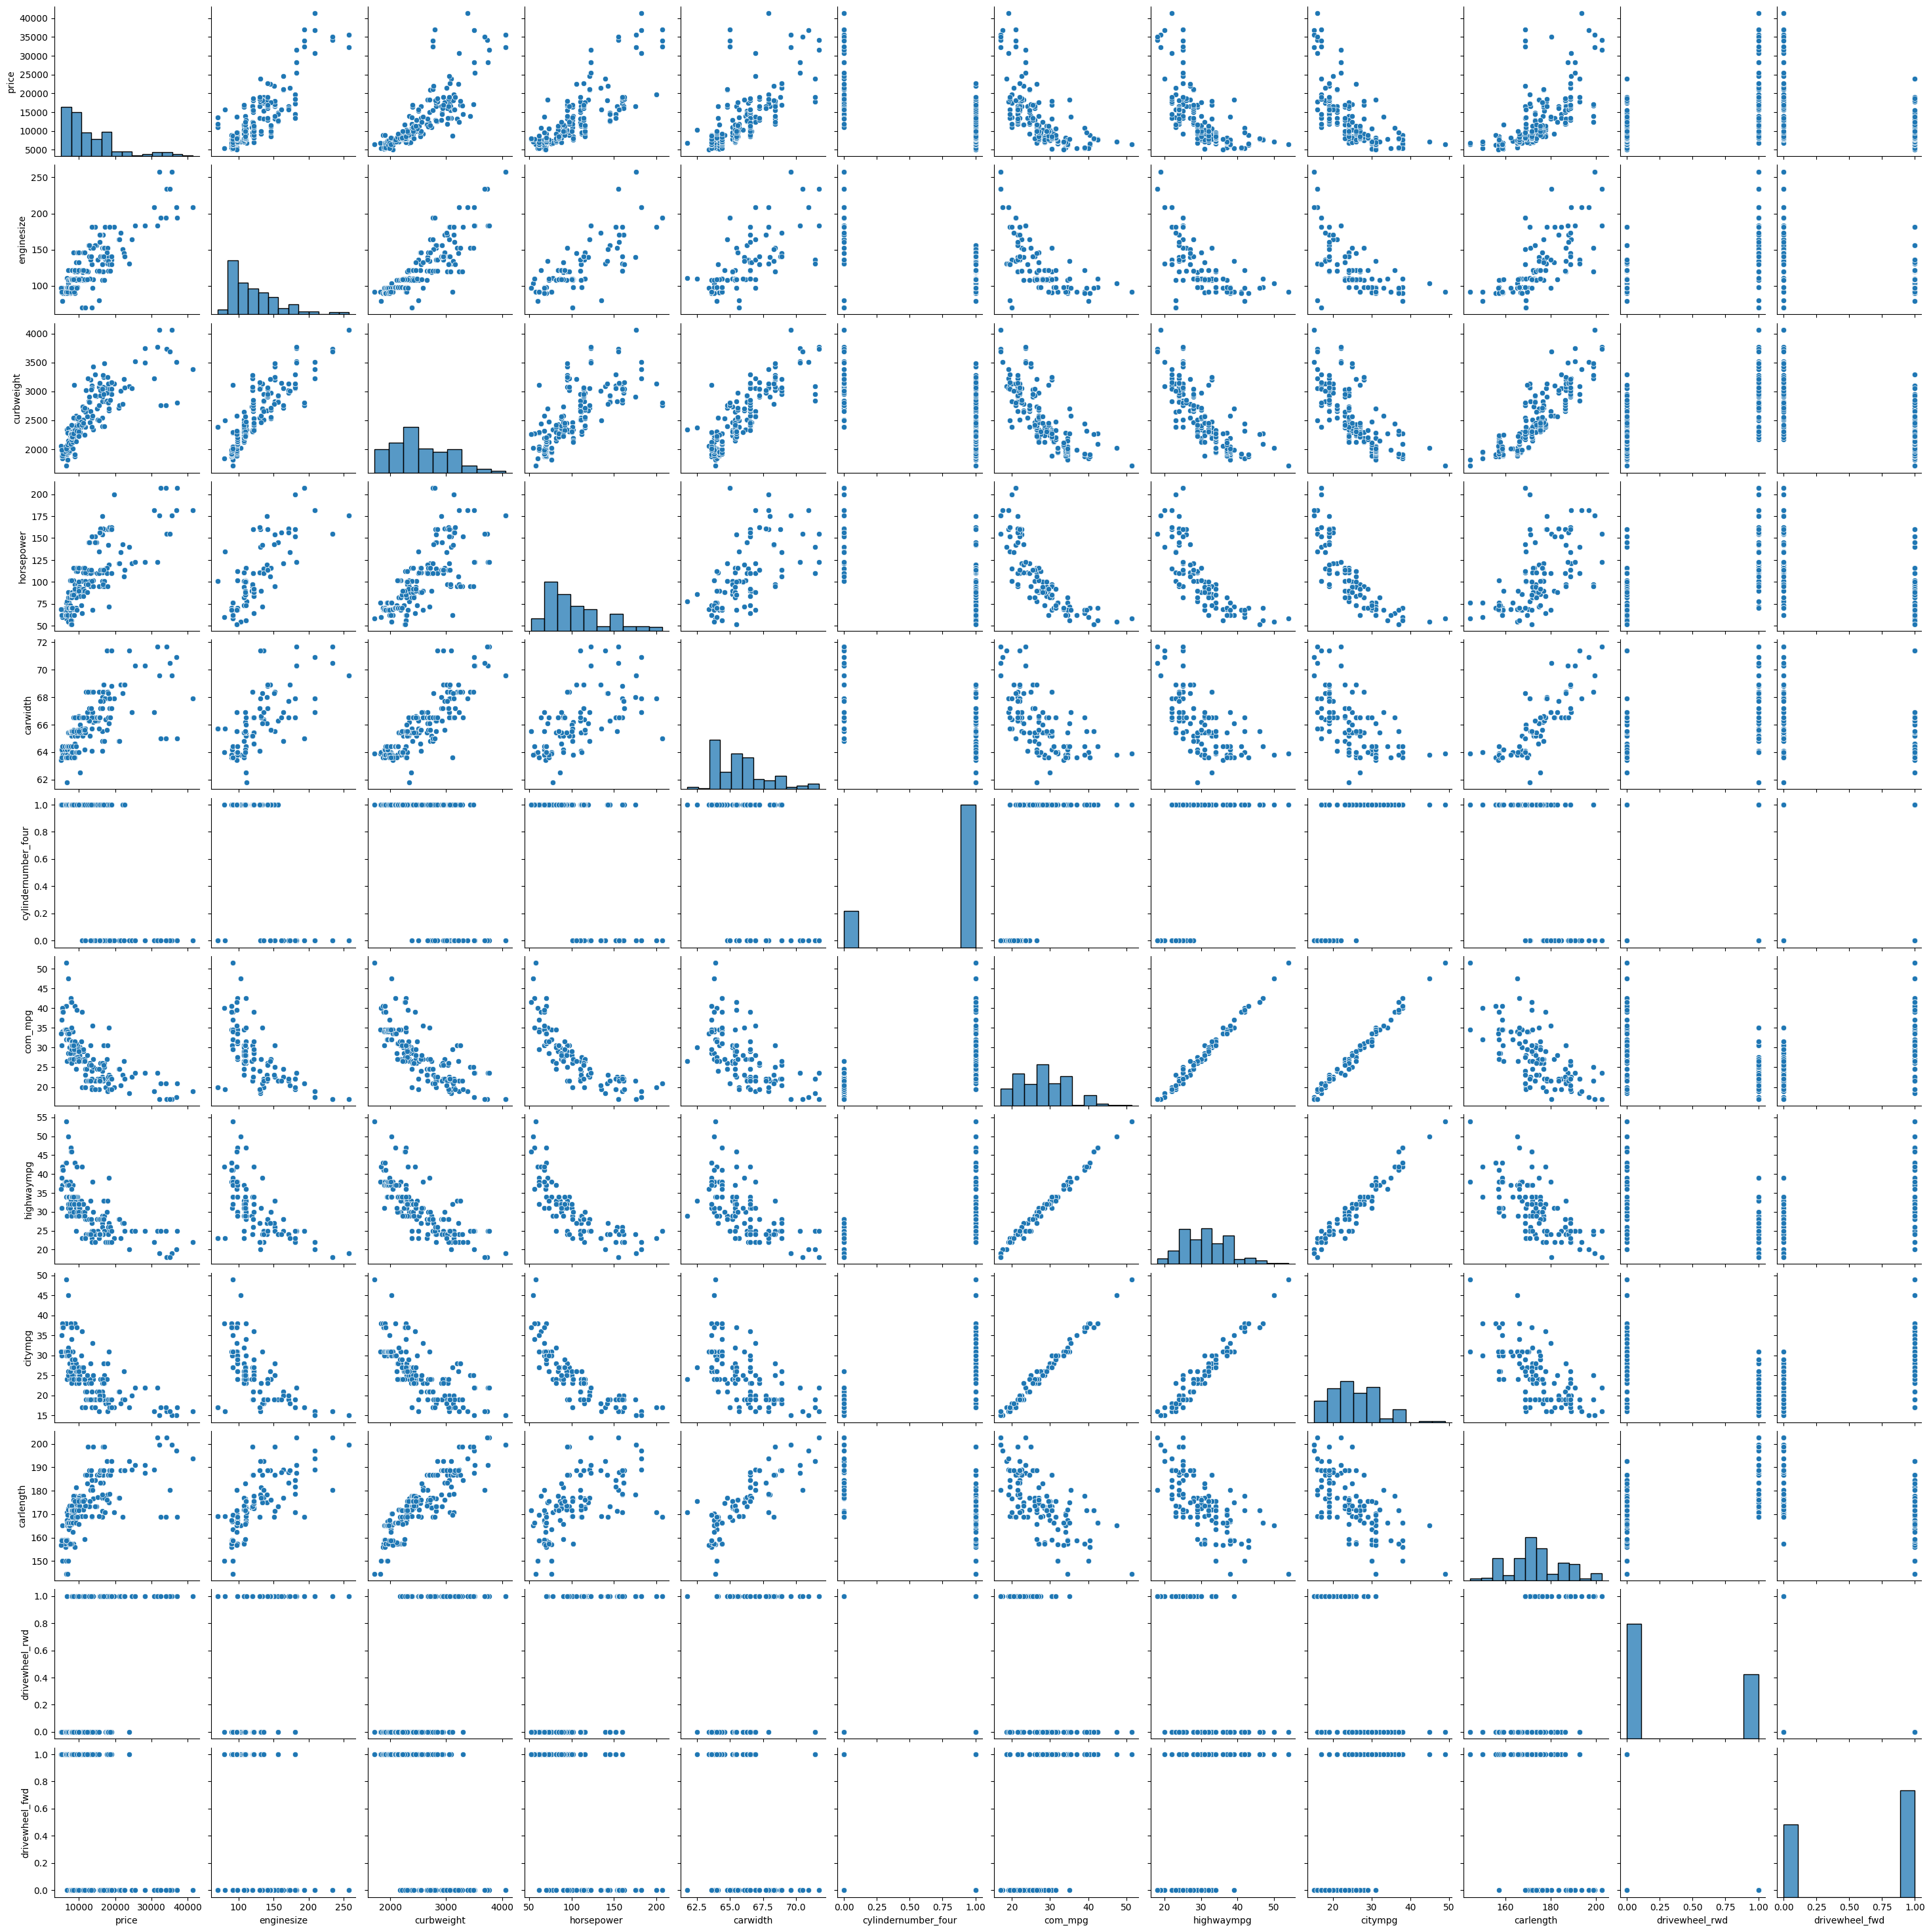

In [47]:
sns.pairplot(car_dataset_dum[columns_correlated])
plt.show()

Columns that could be considered to have a high linear correlation with the target column price:

- Enginesize

- Curbweight

- Carwidth

- Carlength

- Horsepower (exhibiting high heteroscedasticity)

Columns that could be considered to have a high non-linear correlation with the target column price:

- Highwaympg

- Citympg

Variables that exhibit a very high correlation with each other:

- Highwaympg with Citympg:
The alternative we could consider is to combine these two variables, for example, by summing them, to create a new variable called com_mpg.

- Enginesize with Curbweight:
The alternative we could consider is to create an interaction variable between these two.

- Curbweight with Carwidth and Carlength:
The best alternative would be to remove the variables Carwidth and Carlength as predictors, as using only Curbweight provides better performance.

- Horsepower with Curbweight:
The best alternative could be to create an interaction variable between these two.

- Horsepower with com_mpg:
The best alternative would be to create an interaction variable between these two.

- Additionally, we could consider removing Wheelbase, as it does not seem to provide much relevant information and is highly correlated with most of the aforementioned predictor variables.



Let us construct an initial model based on the findings we obtained previously.

In [48]:
car_dataset["com_mpg"] = (car_dataset_dum["highwaympg"] + car_dataset_dum["citympg"])/2

In [49]:
formula_1 = 'price ~ enginesize + curbweight + com_mpg+ horsepower + horsepower*curbweight + horsepower*com_mpg'
y_1, X_1 = patsy.dmatrices(formula_1, car_dataset, return_type='dataframe')

In [50]:
model_1 = sm.OLS(y_1, X_1)
results_1 = model_1.fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     128.6
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           1.12e-64
Time:                        21:54:45   Log-Likelihood:                -1898.3
No. Observations:                 200   AIC:                             3811.
Df Residuals:                     193   BIC:                             3834.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -2.854e+

We will employ graphical methods to assess the performance of the multiple linear regression model, including residual plots, fitted vs. observed values, and other diagnostic visualizations to ensure the model's validity and identify potential areas for improvement.

In [51]:

def lm_stats(X, y, y_pred):
    """ LEVERAGE & STUDENTISED RESIDUALS
    - https://en.wikipedia.org/wiki/Studentized_residual#How_to_studentize
    """
    # Responses as np array vector
    try:
        y.shape[1] == 1
        # take first dimension as vector
        y = y.iloc[:,0]
    except:
        pass
    y = np.array(y)

    # Residuals
    residuals = np.array(y - y_pred)

    # Hat matrix
    H = np.array(X @ np.linalg.inv(X.T @ X)) @ X.T

    # Leverage
    h_ii = np.diagonal(H)

    ## Externally studentised residual
    # In this case external studentisation is most appropriate
    # because we are looking for outliers.

    # Estimate variance (externalised)
    σi_est = []
    for i in range(X.shape[0]):
        # exclude ith observation from estimation of variance
        external_residuals = np.delete(residuals, i)
        σi_est += [np.sqrt((1 / (X.shape[0] - X.shape[1] - 1)) * np.sum(np.square(external_residuals)))]
    σi_est = np.array(σi_est)

    # Externally studentised residuals
    t = residuals / σi_est * np.sqrt(1 - h_ii)


    # Return dataframe
    return pd.DataFrame({'residual': residuals,
                         'leverage': h_ii,
                         'studentised_residual': t,
                         'y_pred': y_pred})


def lm_plot(lm_stats_df):
    """Provides R style residual plots based on results from lm_stat()"""
    # Parse stats
    t      = lm_stats_df['studentised_residual']
    h_ii   = lm_stats_df['leverage']
    y_pred = lm_stats_df['y_pred']

    # setup axis for grid
    plt.figure(1, figsize=(16, 18))

    # Studentised residual plot
    plt.subplot(321)
    ax = sns.regplot(x=y_pred, y=t, lowess=True)
    plt.xlabel('Fitted values')
    plt.ylabel('Studentised residuals')
    plt.title('Externally studentised residual plot', fontweight='bold')
    # Draw Hastie and Tibshirani's bounds for possible outliers
    ax.axhline(y=3, color='r', linestyle='dashed')
    ax.axhline(y=-3, color='r', linestyle='dashed');

    # Normal Q-Q plot
    plt.subplot(322)
    ax = stats.probplot(t, dist='norm', plot=plt)
    plt.ylabel('Studentised residuals')
    plt.title('Normal Q-Q', fontweight='bold')

    # Standardised residuals
    plt.subplot(323)
    ax = sns.regplot(x=y_pred, y=np.sqrt(np.abs(t)), lowess=True)
    plt.xlabel('Fitted values')
    plt.ylabel('√Standardized residuals')
    plt.title('Scale-Location', fontweight='bold')

    # Residuals vs Leverage plot
    plt.subplot(324)
    ax = sns.scatterplot(x=h_ii, y=t)
    plt.xlabel('Leverage')
    plt.ylabel('Studentised residuals')
    plt.title('Externally studentised residual vs Leverage', fontweight='bold');

In [52]:
def lm_residual_corr_plot(lm_stats_df):
    r = lm_stats_df['residual']
    # Residuals correlation
    plt.figure(1, figsize=(16, 5))
    ax = sns.lineplot(x=list(range(r.shape[0])), y=r)
    plt.xlabel('Observation')
    plt.ylabel('Residual')
    plt.title('Correlation of error terms', fontweight='bold');

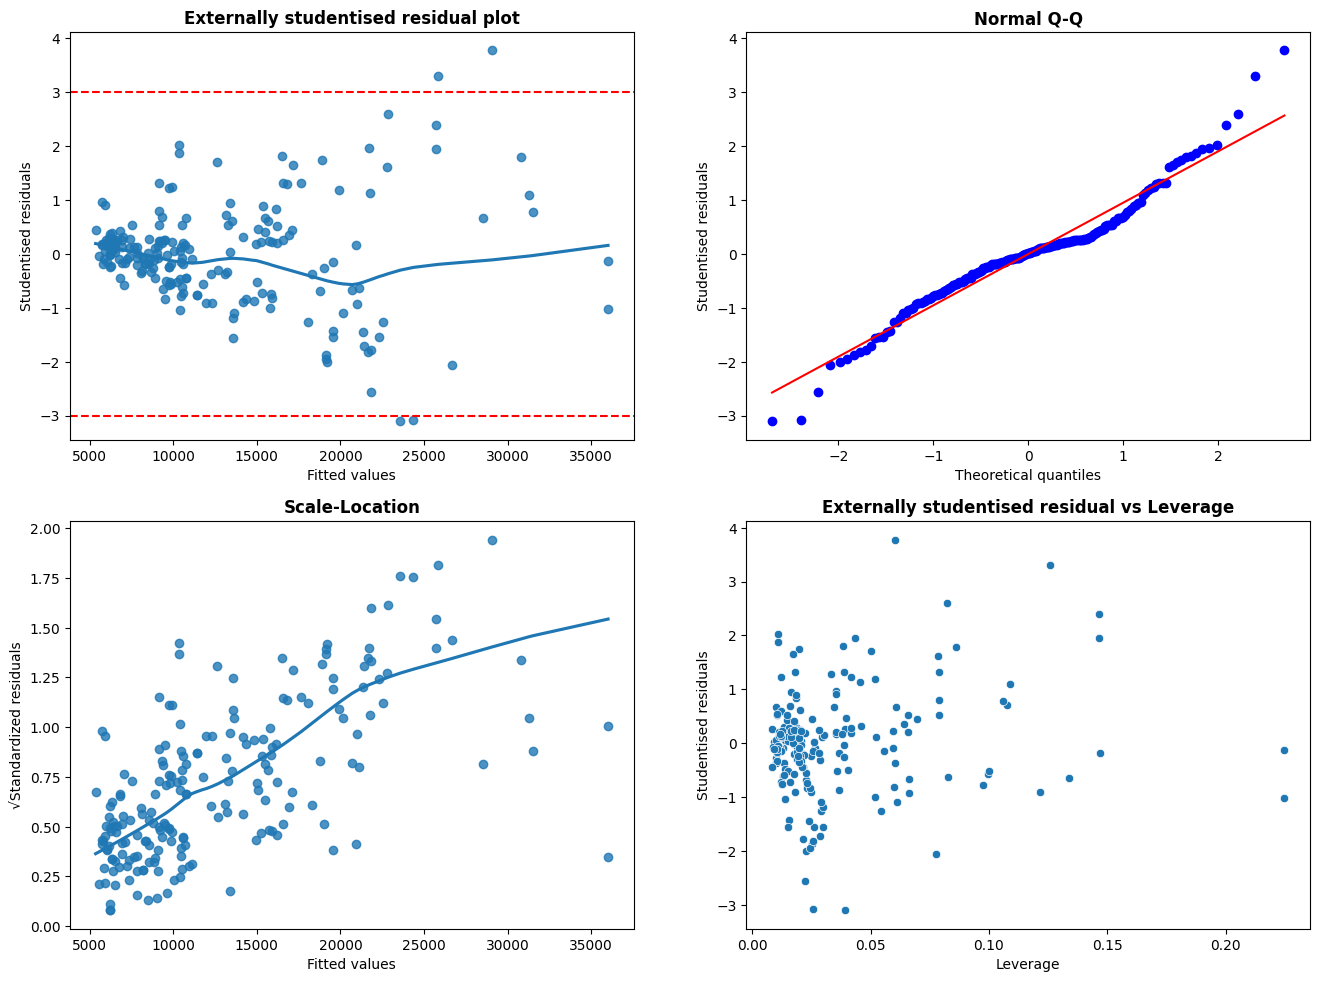

In [53]:
y_1_predict = results_1.predict(X_1)
lm_plot(lm_stats(X_1, y_1, y_1_predict))

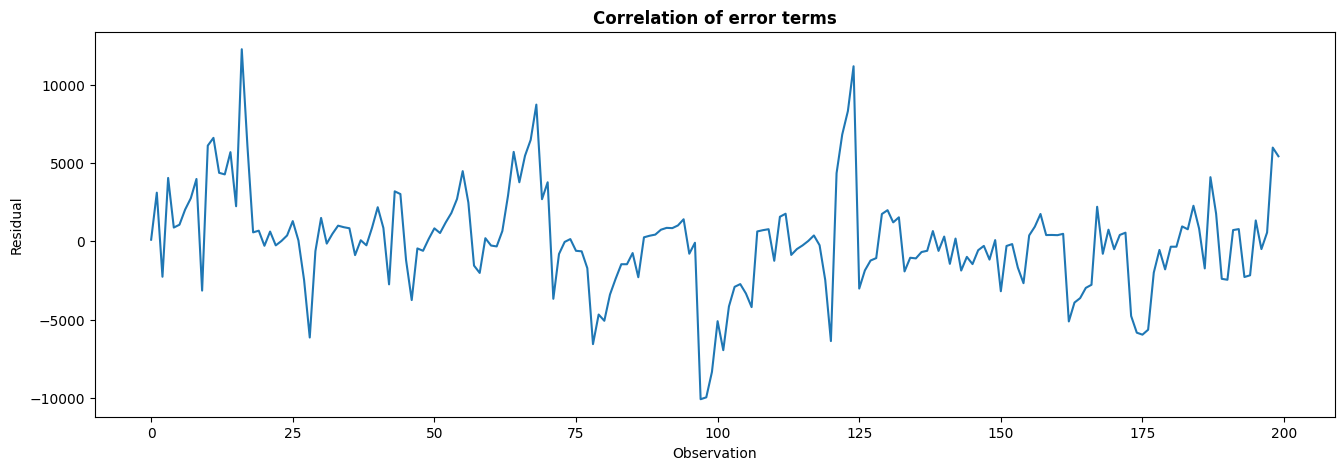

In [54]:
lm_residual_corr_plot(lm_stats(X_1, y_1, y_1_predict))

We observe peaks of very high and very low variance, which can make linear regression analysis particularly challenging for our data.

The diagnostic plots reveal the presence of data points with high leverage coefficients, which can disproportionately influence the regression model and degrade its performance. To mitigate this issue, we will identify and remove outliers or influential points that exhibit significant leverage, thereby improving the robustness and accuracy of the model.

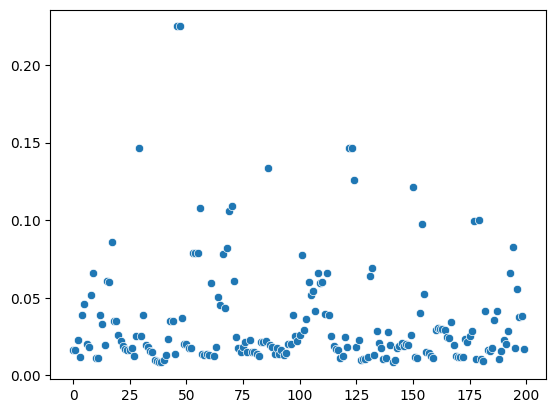

In [55]:
influence = results_1.get_influence()
sns.scatterplot(data=car_dataset_dum, x=np.arange(car_dataset_dum.shape[0]), y=influence.hat_matrix_diag);

In [56]:
high_leverage_points = pd.DataFrame({'leverage': influence.hat_matrix_diag})
high_leverage_points.nlargest(5, 'leverage').index

Index([46, 47, 29, 122, 123], dtype='int64')

In [57]:
car_dataset_dum.drop(high_leverage_points.nlargest(5, 'leverage').index, inplace=True)

In [58]:
car_dataset.drop(high_leverage_points.nlargest(5, 'leverage').index, inplace=True)

The diagnostic plots reveal that the current model demonstrates suboptimal performance and significant heteroscedasticity, characterized by increasing variance as the values of the target variable price increase. To mitigate this issue, I will apply a natural logarithm transformation to the target variable price, which is expected to stabilize the variance and improve the model's performance.



In [59]:
formula_2 = 'np.log(price) ~ enginesize + curbweight + com_mpg+ horsepower + horsepower*curbweight + horsepower*com_mpg'
y_2, X_2 = patsy.dmatrices(formula_2, car_dataset, return_type='dataframe')
y_2.head()

,np.log(price)
0,9.510075
1,9.711116
2,9.711116
3,9.543235
4,9.767095


In [60]:
model_2 = sm.OLS(y_2, X_2)
results_2 = model_2.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     175.6
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           2.79e-74
Time:                        21:54:46   Log-Likelihood:                 52.648
No. Observations:                 195   AIC:                            -91.30
Df Residuals:                     188   BIC:                            -68.38
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 5.27

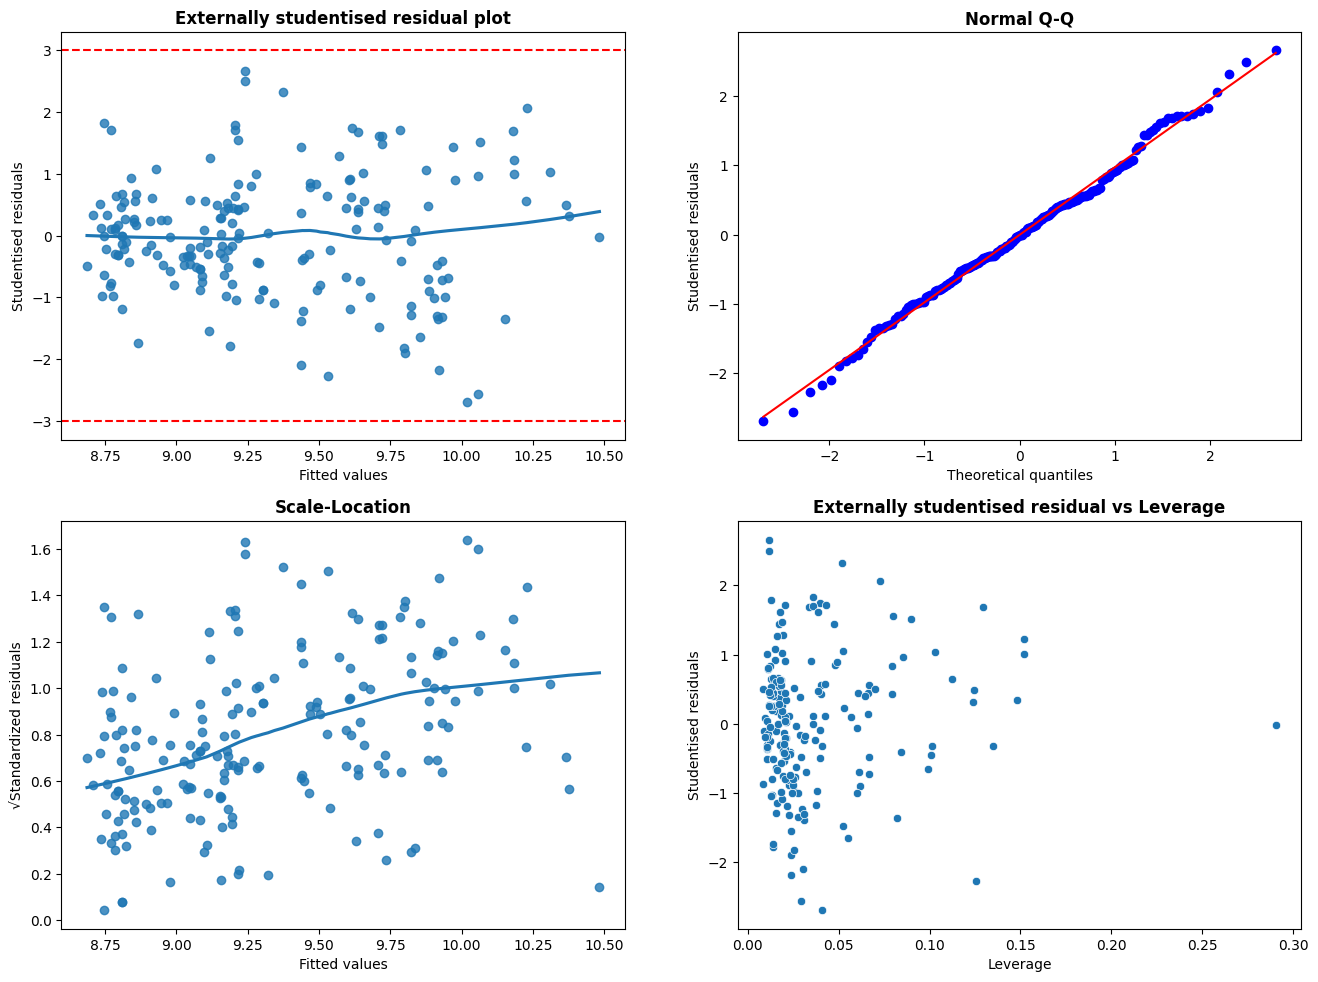

In [61]:
lm_plot(lm_stats(X_2, y_2, results_2.predict(X_2)))

We will evaluate the Root Mean Squared Error (RMSE) of the model to determine its predictive accuracy and overall performance. This metric will provide insight into the average magnitude of the errors between the predicted and actual values.

In [62]:
rmse = np.sqrt(mean_squared_error(np.exp(y_2), np.exp(results_2.predict(X_2))))
print("RMSE:", rmse)

RMSE: 3057.2162312534247


In [63]:
error_relativo = rmse / np.mean(np.exp(y_2))
print(f"Error relativo: {error_relativo:.2%}")

Error relativo: 23.94%


We will calculate the Variance Inflation Factor (VIF) for the predictor variables to assess the degree of multicollinearity present in the dataset. Excessive multicollinearity can adversely affect the stability and interpretability of the regression model, making it essential to identify and address such issues.



In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_2.columns
vif_data["VIF"] = [VIF(X_2.values, i) for i in range(X_2.shape[1])]
vif_data

,feature,VIF
0,Intercept,2420.867245
1,enginesize,6.663409
2,curbweight,32.091929
3,com_mpg,27.472743
4,horsepower,334.463023
5,horsepower:curbweight,267.805242
6,horsepower:com_mpg,24.774862


We will eliminate the two variables with excessively high Variance Inflation Factor (VIF) values, specifically horsepower and the interaction term horsepower:curbweight, to reduce multicollinearity and improve the model's performance and interpretability.

In [82]:
X_3 = X_2.drop(columns=["horsepower", "horsepower:curbweight", "horsepower:com_mpg"])
y_3 = y_2.copy()
model_3 = sm.OLS(y_3, X_3)
results_3 = model_3.fit()
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     280.7
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           9.77e-70
Time:                        22:01:19   Log-Likelihood:                 33.155
No. Observations:                 195   AIC:                            -58.31
Df Residuals:                     191   BIC:                            -45.22
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.1339      0.207     39.325      0.0

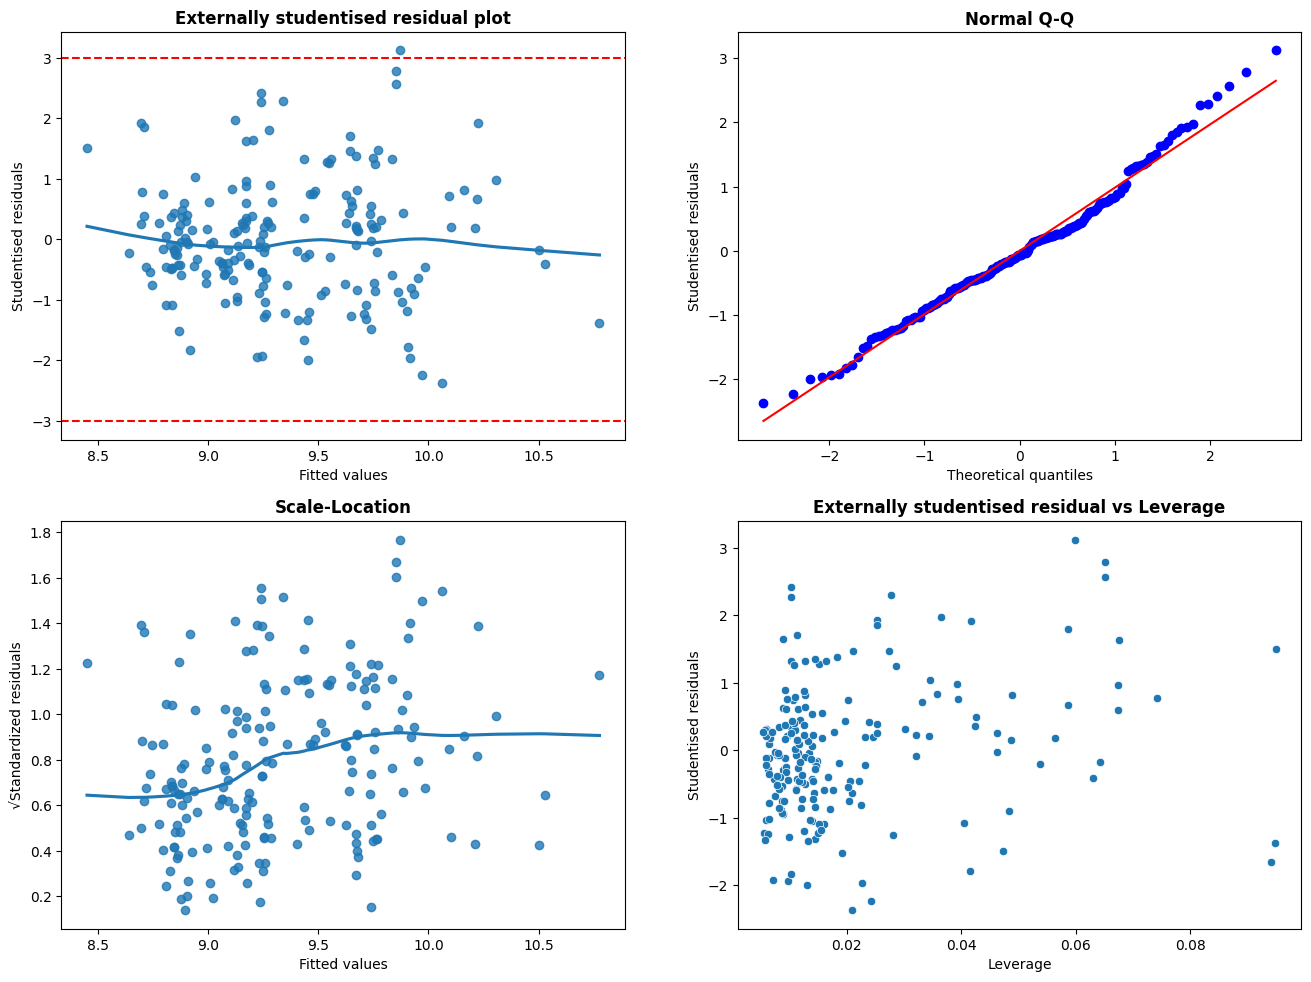

In [83]:
lm_plot(lm_stats(X_3, y_3, results_3.predict(X_3)))

In [84]:
y_predict = results_3.predict(X_3)
rmse = np.sqrt(mean_squared_error(np.exp(y_3), np.exp(y_predict)))
print("RMSE:", rmse)

RMSE: 3494.6732032339282


In [89]:
vif_data_3 = pd.DataFrame()
vif_data_3["feature"] = X_3.columns
vif_data_3["VIF"] = [VIF(X_3.values, i) for i in range(X_3.shape[1])]
vif_data_3

,feature,VIF
0,Intercept,196.093100
1,enginesize,3.494504
2,curbweight,4.746379
3,com_mpg,2.362543


The current model, despite exhibiting a higher RMSE and a higher $R^2$, incorporates more statistically significant variables with reduced intercorrelation. This reduction in multicollinearity helps mitigate overfitting and enhances the model's predictive capability. Nevertheless, it is crucial to acknowledge the limitations posed by the small sample size and the increasing error variance as the price of the vehicles rises. These factors introduce additional complexity to the regression analysis, making it more challenging to derive robust conclusions from this dataset.